In [1]:
import os
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib as mpl

mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 18
mpl.rcParams["axes.labelsize"] = 22
mpl.rcParams['legend.fontsize'] = 24
mpl.rcParams['axes.titlesize'] = 25
mpl.rcParams['text.usetex'] = True
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [3]:
OUT_PATH = "../output/"
NUM_CLASSES = 250

## 10 Tasks with 25 Classes

In [4]:
N_TASKS = 10

In [5]:
def load_result(model_type, pretrained, task_id, n_tasks, template, metric):
    out_fp = os.path.join(OUT_PATH, f"{model_type}/{pretrained}/{template}_{n_tasks}_tasks_{task_id}.json")
    with open(out_fp, 'r') as file:
        output = json.load(file)
    return np.array([output["classification_report"][str(i)][metric] for i in range(NUM_CLASSES // n_tasks)])

def create_ax(ax, metric, model_type, pretrained, colors):
    baseline_color, my_color = colors
    result_temp = []
    result_ideal = []
    for task_id in range(N_TASKS):
        result_temp.append(load_result(model_type, pretrained, task_id, N_TASKS, "imagenet1k", metric).mean())
        result_ideal.append(load_result(model_type, pretrained, task_id, N_TASKS, "imagenet_captions", metric).mean())

    bar_width = 0.3
    x = np.arange(len(result_temp))
    ax.bar(x - bar_width/2, result_temp, bar_width, color=baseline_color, edgecolor="k", label="Template-based Prompting")
    ax.bar(x + bar_width/2, result_ideal, bar_width, color=my_color, edgecolor="k", label=r"Ideal Prompting ($P_{Z|Y}$)")
    ax.set_xticks(x)
    ax.set_xticklabels(x + 1)
    ax.set_xlabel("Task Index")

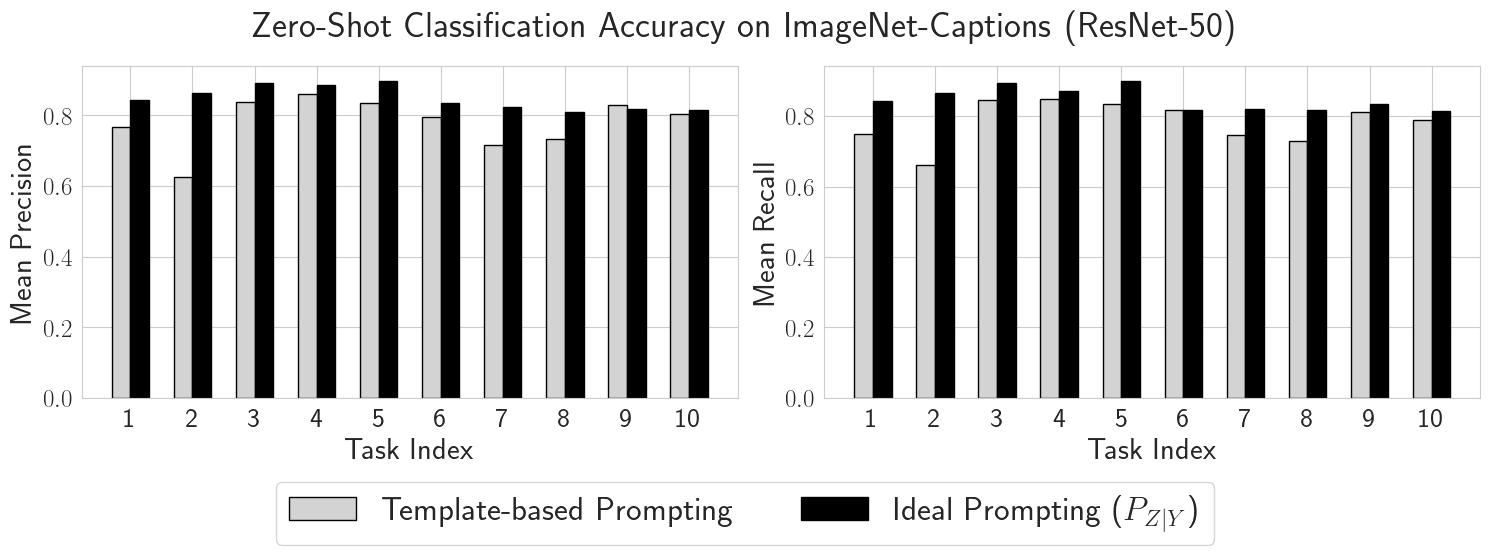

In [6]:
model_type, pretrained = ('RN50', 'yfcc15m')

sns.set_style("whitegrid")

scale = 3
fig, axes = plt.subplots(1, 2, figsize=(5 * scale, 1.6 * scale))

create_ax(axes[0], "precision", model_type, pretrained, ("lightgray", "k"))
create_ax(axes[1], "recall", model_type, pretrained, ("lightgray", "k"),)

axes[0].set_ylabel("Mean Precision")
axes[1].set_ylabel("Mean Recall")

fig.suptitle("Zero-Shot Classification Accuracy on ImageNet-Captions (ResNet-50)", fontsize=26)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles=handles, labels=labels, loc='center', bbox_to_anchor=(0.5, -0.07), ncol=2)
fig.tight_layout()

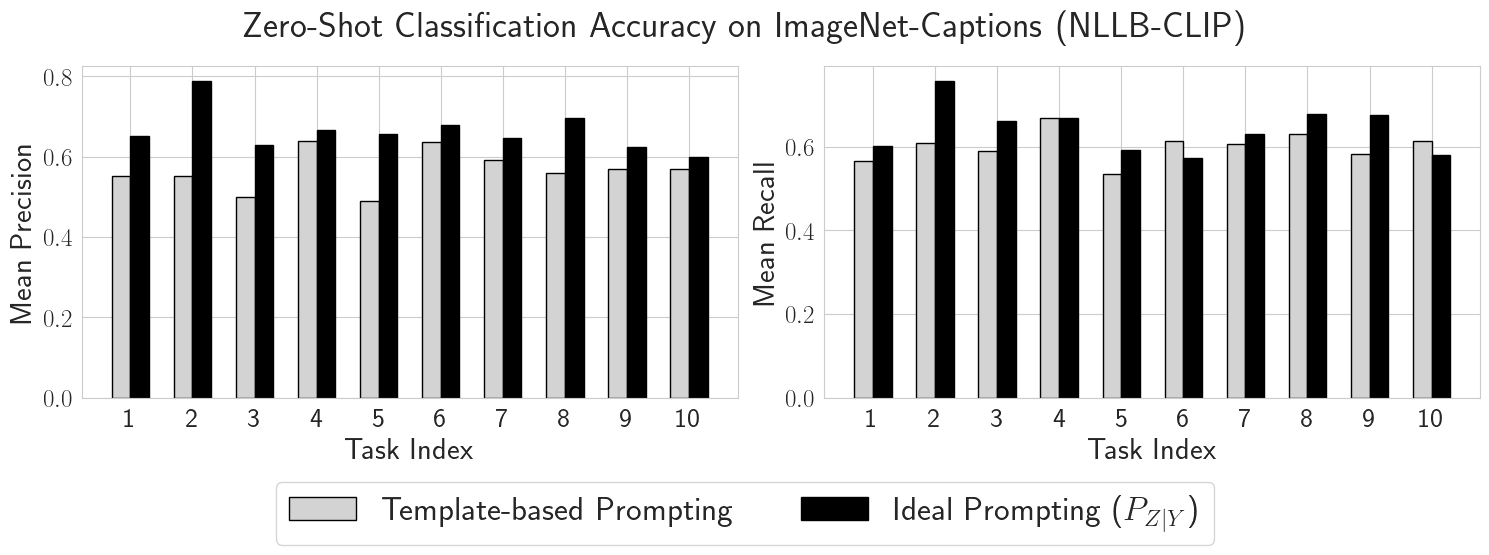

In [7]:
model_type, pretrained = ('nllb-clip-base', 'v1')

sns.set_style("whitegrid")

scale = 3
fig, axes = plt.subplots(1, 2, figsize=(5 * scale, 1.6 * scale))

create_ax(axes[0], "precision", model_type, pretrained, ("lightgray", "k"))
create_ax(axes[1], "recall", model_type, pretrained, ("lightgray", "k"),)

axes[0].set_ylabel("Mean Precision")
axes[1].set_ylabel("Mean Recall")

fig.suptitle("Zero-Shot Classification Accuracy on ImageNet-Captions (NLLB-CLIP)", fontsize=26)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles=handles, labels=labels, loc='center', bbox_to_anchor=(0.5, -0.07), ncol=2)
fig.tight_layout()

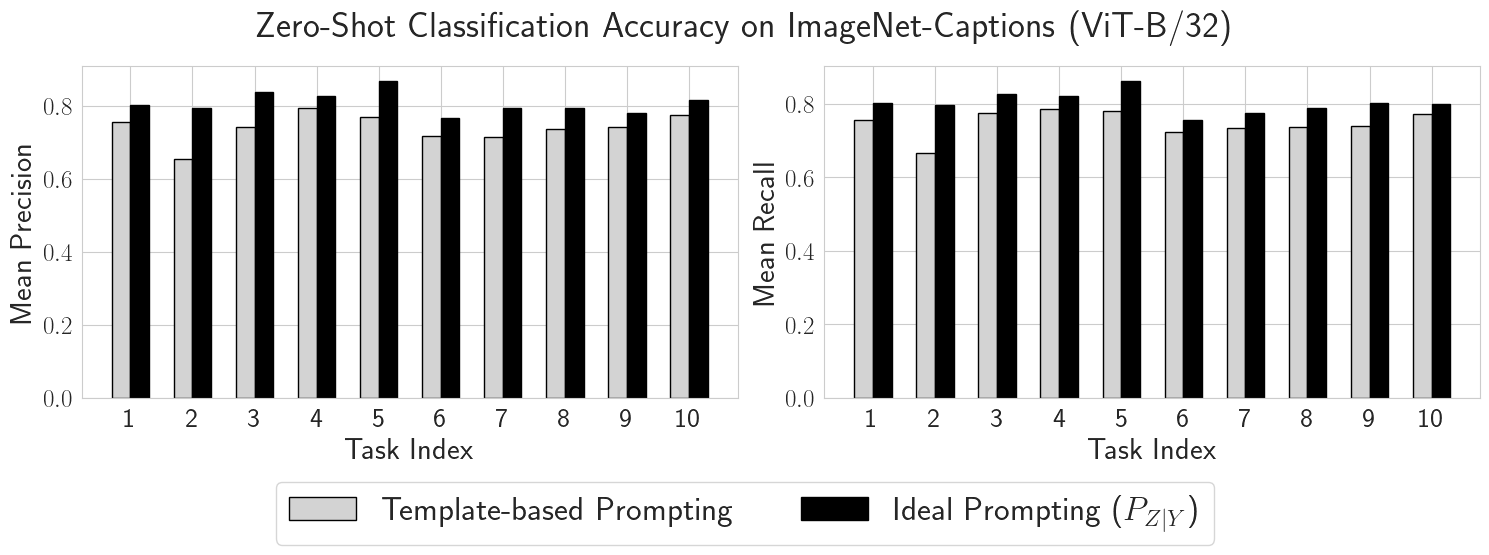

In [8]:
model_type, pretrained = ('ViT-B-32', 'datacomp_m_s128m_b4k')

sns.set_style("whitegrid")

scale = 3
fig, axes = plt.subplots(1, 2, figsize=(5 * scale, 1.6 * scale))

create_ax(axes[0], "precision", model_type, pretrained, ("lightgray", "k"))
create_ax(axes[1], "recall", model_type, pretrained, ("lightgray", "k"),)

axes[0].set_ylabel("Mean Precision")
axes[1].set_ylabel("Mean Recall")

fig.suptitle("Zero-Shot Classification Accuracy on ImageNet-Captions (ViT-B/32)", fontsize=26)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles=handles, labels=labels, loc='center', bbox_to_anchor=(0.5, -0.07), ncol=2)
fig.tight_layout()

## 5 Tasks with 50 Classes

In [9]:
N_TASKS = 5

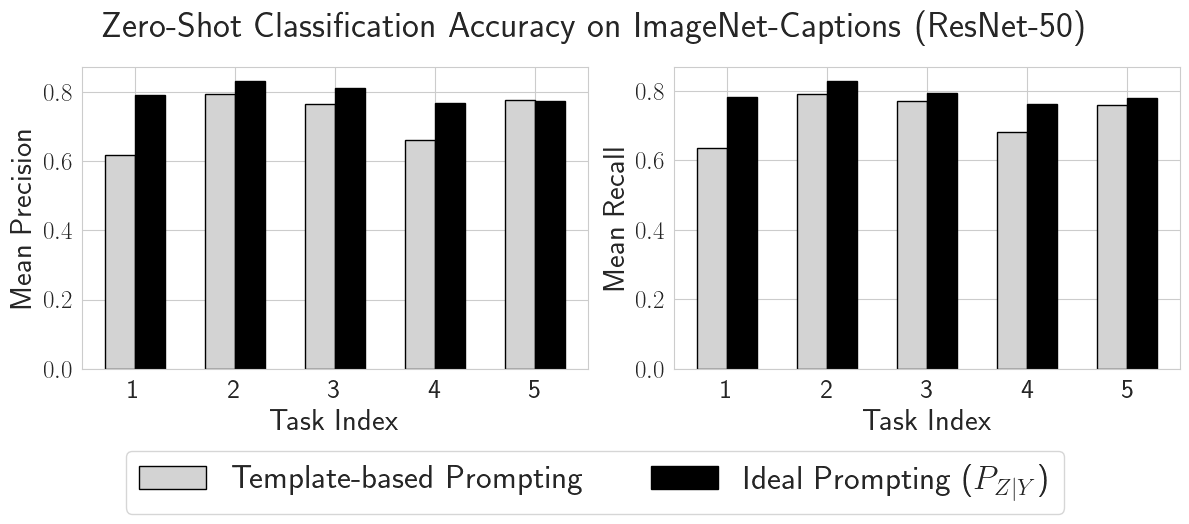

In [10]:
model_type, pretrained = ('RN50', 'yfcc15m')

sns.set_style("whitegrid")

scale = 3
fig, axes = plt.subplots(1, 2, figsize=(4 * scale, 1.5 * scale))

create_ax(axes[0], "precision", model_type, pretrained, ("lightgray", "k"))
create_ax(axes[1], "recall", model_type, pretrained, ("lightgray", "k"),)

axes[0].set_ylabel("Mean Precision")
axes[1].set_ylabel("Mean Recall")

fig.suptitle("Zero-Shot Classification Accuracy on ImageNet-Captions (ResNet-50)", fontsize=26)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles=handles, labels=labels, loc='center', bbox_to_anchor=(0.5, -0.07), ncol=2)
fig.tight_layout()

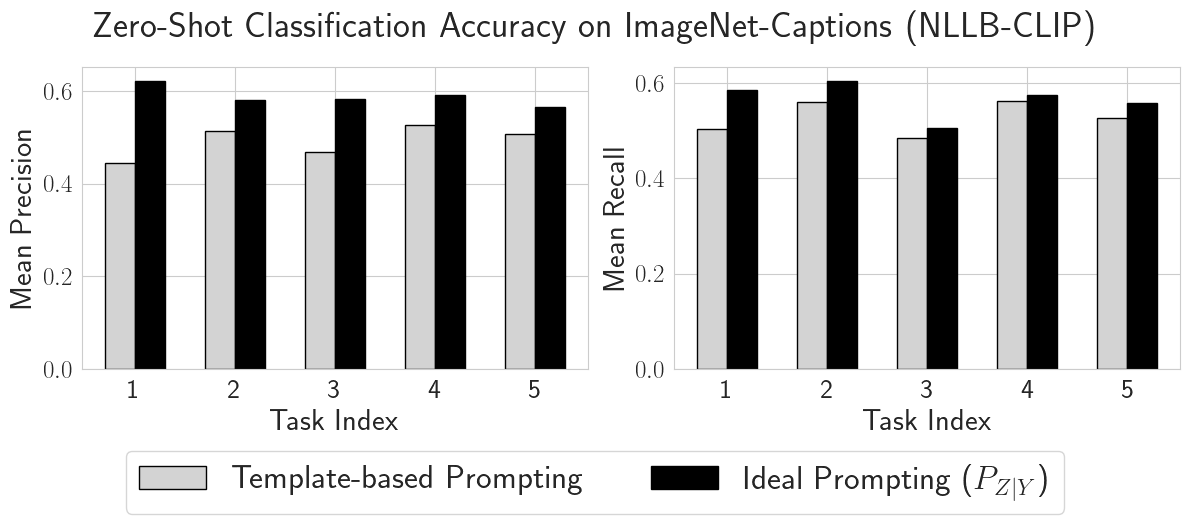

In [11]:
model_type, pretrained = ('nllb-clip-base', 'v1')

sns.set_style("whitegrid")

scale = 3
fig, axes = plt.subplots(1, 2, figsize=(4 * scale, 1.5 * scale))

create_ax(axes[0], "precision", model_type, pretrained, ("lightgray", "k"))
create_ax(axes[1], "recall", model_type, pretrained, ("lightgray", "k"),)

axes[0].set_ylabel("Mean Precision")
axes[1].set_ylabel("Mean Recall")

fig.suptitle("Zero-Shot Classification Accuracy on ImageNet-Captions (NLLB-CLIP)", fontsize=26)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles=handles, labels=labels, loc='center', bbox_to_anchor=(0.5, -0.07), ncol=2)
fig.tight_layout()

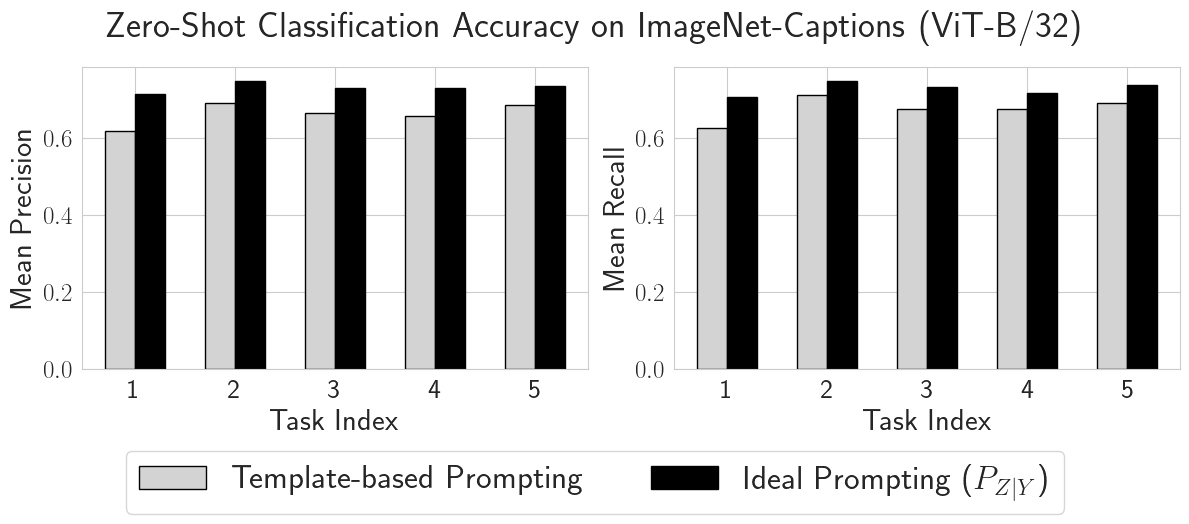

In [12]:
model_type, pretrained = ('ViT-B-32', 'datacomp_m_s128m_b4k')

sns.set_style("whitegrid")

scale = 3
fig, axes = plt.subplots(1, 2, figsize=(4 * scale, 1.5 * scale))

create_ax(axes[0], "precision", model_type, pretrained, ("lightgray", "k"))
create_ax(axes[1], "recall", model_type, pretrained, ("lightgray", "k"),)

axes[0].set_ylabel("Mean Precision")
axes[1].set_ylabel("Mean Recall")

fig.suptitle("Zero-Shot Classification Accuracy on ImageNet-Captions (ViT-B/32)", fontsize=26)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles=handles, labels=labels, loc='center', bbox_to_anchor=(0.5, -0.07), ncol=2)
fig.tight_layout()